# An Introduction to Plotting and Data Analysis in Python 6

Clyde Fare and João Pedro Malhado, Imperial College London, (contact: [python@imperial.ac.uk](mailto:python@imperial.ac.uk))

This notebook includes experimental data provided by Zita Martins, and is licensed under a [Creative Commons Attribution 4.0 (CC-by) license](http://creativecommons.org/licenses/by/4.0/)

For this problem set, instead of solving the exercises on this notebook, create a new separate notebook for your answers (you can do this from the *dashboard* - the browser window you launched this notebook from). Choose appropriate headings, and give your answers by providing the code cells and outputs, as well as commenting on markdown cells.

Don't forget to load *pylab* and import the *scipy* modules needed.

    %pylab inline
    from scipy.optimize import curve_fit

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.optimize import curve_fit

## Exercise 1

The file [chromatogram_ion126.dat](files/chromatogram_ion126.dat) contains data from an experiment combining gas chromatography with a mass spectrometer. The experiment aims to determine the amount of the glycine present in a sample of ice. The first column of the data corresponds to the time after the sample is injected into the column (units are minutes), the second column corresponds to the intensity measured by the  mass spectrometer (units are counts of detector hits per minute).

* In one figure plot the full chromatogram
* In a second figure create a plot zoomed in on the largest peak (this peak marks the point when glycine reached the mass spectrometer).

In [4]:
chrome=loadtxt('chromatogram_ion126.dat')

In [5]:
time=chrome[:,0]
intensity=chrome[:,1]

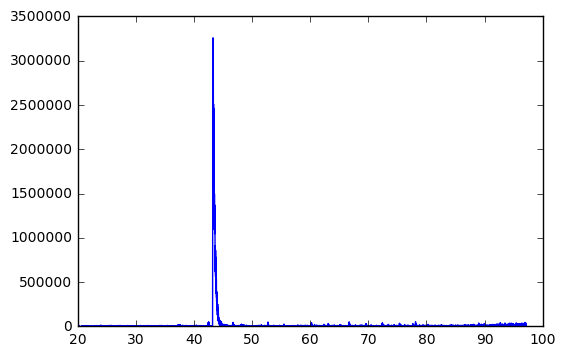

In [6]:
plot(time,intensity, marker='', linestyle='-')
show()

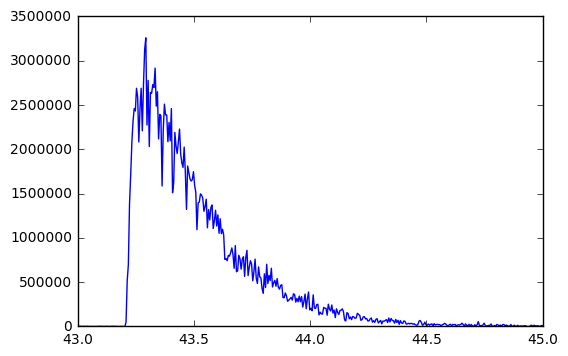

In [7]:
plot(time,intensity, marker='', linestyle='-')
xlim(43,45)
show()

The objective of the experiment is to determine the concentration of glycine in the sample. When the instrument was calibrated the  following relationship between the number of moles of glycine in a sample and the area under the subsequent chromatogram peak was determined as:

$$\frac{A_{\text{gly}}}{A_{\text{std}}}= 8.33 \times 10^4 \times n_{\text{gly}} - 7 \times 10^{-4} ,$$

where:
*A<sub>gly</sub>* is the area under the glycine peak, 
*n<sub>gly</sub>* is the number of moles of glycine
*A<sub>std</sub>* is a calibration constant equal to 9.538 &times; 10<sup>6</sup> counts.

The area under the glycine peak can be calculated in a variery of ways, here we will do so by fitting a function to the peak then determining the area under the function. If you inspect the peak above you will notice that it is asymmetric, with a very fast rise from about zero up to it's maximum value and a comparativelly slower decay back down to zero.

This behaviour can be captured with the following function

$$f(t)=a (t-t_0) e^{-\frac{t-t_0}{b}} ,$$

where
*t<sub>0</sub>* corresponds to the time the peak starts, *a* is a parameter controlling the rise and hight of the peak and *b* is a parameter  controling the decay of the peak. 

The area under such a function is:

$$Area=a b^2 .$$

* Fit the function to your data \*
* Plot the experimental data and the fitted curve on the same figure to check the fit is sensible.
* Determine the area under the peak

\*For convenience the fitting function *gly_intensity* is given below.

In [ ]:
def gly_intensity(t,a,b,t0):
    "Fitting function allowing a fast rise and a slow exponential tail"
    x=(abs(t-t0)+(t-t0))/2. # This is a trick used so that the function returns 0 when t<t0. Can you understand what is being done?
    return a*x*e**(-x/b)

* Plot and comment on the residuals of your fitted curve. Do you have any ideas for an improved fitting function you would like to try?

* What is the concentration of glycine in the original sample knowing 1 &mu;l was injected in the chromatograph?

## Exercise 2

The following mathematical function *g1* corresponds to a Gaussian curve:

$$g1(x,a,s,x0)=a e^{-\frac{(x-x0)^2}{2 s^2}} .$$

Function *g2* is a sum of two Gaussian curves. 

We are setting the *a* and *s* parameters to be equal for both Gaussians and the *x0* of one gaussian to be minus the *x0* of the other:

$$g2(x,a,s,d)=g1(x,a,s,d)+g1(x,a,s,-d)=a \left(e^{-\frac{(x+d)^2}{2 s^2}}+e^{-\frac{(x-d)^2}{2 s^2}}\right) .$$

* Define python function corresponding to function *g1*.

* Use your *g1* function to define a second function for *g2*.

* Use this to produce several plots of *g2* against *x* using different values of the parameters to identify the effect of the parameters on the curve.

* Use a 3d plot or a projected plot to visualise *g2* as a function of both *x* and *d* simultaneously.

## Exercise 3

A molecule can be promoted to an excited state by absorbing light. Once in that excited state it can then fall back to it's original state by emitting light - a process called fluorescence. The wavelength of the emitted light depends on the properties of the molecule and a great deal of information about a molecule can be determine by examining the light it emits.

The file [anthracene_fluo.dat](files/anthracene_fluo.dat) contains data for the emission spectrum of a solution of [anthracene](http://en.wikipedia.org/wiki/Anthracene) in cyclohexane. The first column corresponds to the wavelength of the emitted light (in units of nanometers) and the second column corresponds to the intensity of the emitted light (units are arbitrary). Note that the file has a preamble with some technical details about the spectrum before the data starts. This is fairly normal for files output by spectrometers. Use the *skyprows* option from loadtxt() to load the file's data.

* Load the data and plot the full spectrum.

* Construct a function that will suitably fit the full spectrum. (Note: In spectroscopy it is common practice to fit individual peaks of a spectrum using Gaussian functions.)

* Fit the function to the spectrum data and plot both spectrum and fitted function together on a single figure.

* Using the parameters you've extracted from your fitting procedure, add to the previous figure plots of the individual peaks that form the spectrum.

With the exception of the peak centered at around 340 nm and the broad less intense peak centred around 475 nm (which are due to different phenomena occuring during the experiment), all other peaks form what is called a vibronic progression of the anthracene molecule.

* Plot the wavelength corresponding to the centre of each of the peaks of anthracene against peak number counting from lower wavelengths and comment on your result.

The results you have obtained relate to the vibration of the molecule -you will learn much more about this phenomena later on during the degree.

### If you have time and are feeling adventurous

Depending on the number of gaussians you used to fit the spectrum you should have obtained a rather good fit. However, you can do better! Even though it looks like the anthracene spectrum is formed by a single vibronic progression (excluding the 340nm and 475nm peaks), in fact, each the 4 more intense apparent peak is formed by two underlying peaks corresponding to two closely overlapping vibronic progressions. Improve your fitting function such as to capture both vibronic progressions and you will obtain a noticiably better fit. 

Now that you are capturing both sets of vibronic progressions you can now produce two plots of the wavelengths vs. an integer index for the two progressions.